![example](images/director_shot.jpeg)

# Project Title

**Authors:** Gaja Sanch
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [165]:
# Import standard packages
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [367]:
# Here you run your code to explore the data
df1= pd.read_csv('ZippedData/bom.movie_gross.csv.gz')


In [368]:
df1.head(20)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [191]:
df1.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [181]:
df4.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [363]:
df2= pd.read_csv('ZippedData/imdb.title.basics.csv.gz')

In [230]:
df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [237]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234958 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           234958 non-null  object 
 1   title            234958 non-null  object 
 2   start_year       234958 non-null  int64  
 3   runtime_minutes  195904 non-null  float64
 4   genres           229550 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.8+ MB


In [364]:
df2 = df2.assign(genres=df2['genres'].str.split(',')).explode('genres')
df2.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Comedy
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Drama


In [11]:
df2.shape

(146144, 6)

In [369]:
df2 = df2.rename(columns={'primary_title': 'title'})
df2= df2.drop(columns=['original_title'])

KeyError: "['original_title'] not found in axis"

In [370]:
#merge df1 &df2
merged_df1df2 = pd.merge(df1, df2, on='title')
merged_df1df2.head(10)

,title,studio,domestic_gross,foreign_gross,year,tconst,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,2010,103.0,Adventure
1,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,2010,103.0,Animation
2,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,2010,103.0,Comedy
3,Inception,WB,292600000.0,535700000,2010,tt1375666,2010,148.0,Action
4,Inception,WB,292600000.0,535700000,2010,tt1375666,2010,148.0,Adventure
5,Inception,WB,292600000.0,535700000,2010,tt1375666,2010,148.0,Sci-Fi
6,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,2010,93.0,Adventure
7,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,2010,93.0,Animation
8,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,2010,93.0,Comedy
9,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,2010,124.0,Adventure


In [250]:
merged_df1df2.tail(10)

,title,studio,domestic_gross,foreign_gross,year,tconst,start_year,runtime_minutes,genres
7461,Souvenir,Strand,11400.0,NaN,2018,tt2389092,2014,86.0,Comedy
7462,Souvenir,Strand,11400.0,NaN,2018,tt2389092,2014,86.0,Romance
7463,Souvenir,Strand,11400.0,NaN,2018,tt3478898,2014,86.0,Documentary
7464,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,2017,100.0,Crime
7465,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,2017,100.0,Drama
7466,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,2017,100.0,Thriller
7467,The Quake,Magn.,6200.0,NaN,2018,tt6523720,2018,106.0,Action
7468,The Quake,Magn.,6200.0,NaN,2018,tt6523720,2018,106.0,Drama
7469,The Quake,Magn.,6200.0,NaN,2018,tt6523720,2018,106.0,Thriller
7470,An Actor Prepares,Grav.,1700.0,NaN,2018,tt5718046,2018,97.0,Comedy


In [252]:
merged_df1df2.isna().sum()

title                 0
studio                6
domestic_gross       52
foreign_gross      2742
year                  0
tconst                0
start_year            0
runtime_minutes     209
genres               40
dtype: int64

In [253]:
merged_df1df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7471 entries, 0 to 7470
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            7471 non-null   object 
 1   studio           7465 non-null   object 
 2   domestic_gross   7419 non-null   float64
 3   foreign_gross    4729 non-null   object 
 4   year             7471 non-null   int64  
 5   tconst           7471 non-null   object 
 6   start_year       7471 non-null   int64  
 7   runtime_minutes  7262 non-null   float64
 8   genres           7431 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 583.7+ KB


In [254]:
df3= pd.read_csv('ZippedData/imdb.title.ratings.csv.gz')
df4= pd.read_csv('ZippedData/tn.movie_budgets.csv.gz')


In [255]:
df3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
df3.shape

(73856, 3)

In [256]:
df4.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [351]:

df4 = df4.rename(columns={'movie': 'title'})
df4.head(100)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
95,96,"Mar 8, 2019",Captain Marvel,"$175,000,000","$426,525,952","$1,123,061,550"
96,97,"Apr 15, 2016",The Jungle Book,"$175,000,000","$364,001,123","$962,854,547"
97,98,"Jun 19, 2015",Inside Out,"$175,000,000","$356,461,711","$854,235,992"
98,99,"Jul 7, 2017",Spider-Man: Homecoming,"$175,000,000","$334,201,140","$880,166,350"


In [350]:
#merge df2 &df4
merged_df2df4 = pd.merge(df2, df4, on='title')
merged_df2df4.head(100)

KeyError: 'title'

In [274]:
merged_df2df4.isna().sum()

tconst                 0
title                  0
start_year             0
runtime_minutes      645
genres                72
id                     0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

In [275]:
merged_df2df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7868 entries, 0 to 7867
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             7868 non-null   object 
 1   title              7868 non-null   object 
 2   start_year         7868 non-null   int64  
 3   runtime_minutes    7223 non-null   float64
 4   genres             7796 non-null   object 
 5   id                 7868 non-null   int64  
 6   release_date       7868 non-null   object 
 7   production_budget  7868 non-null   object 
 8   domestic_gross     7868 non-null   object 
 9   worldwide_gross    7868 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 676.2+ KB


In [312]:
df6=merged_df2df4.dropna()
df6.isna().sum()


tconst               0
title                0
start_year           0
runtime_minutes      0
genres               0
id                   0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [278]:

df6.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7204 entries, 0 to 7866
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             7204 non-null   object 
 1   title              7204 non-null   object 
 2   start_year         7204 non-null   int64  
 3   runtime_minutes    7204 non-null   float64
 4   genres             7204 non-null   object 
 5   id                 7204 non-null   int64  
 6   release_date       7204 non-null   object 
 7   production_budget  7204 non-null   object 
 8   domestic_gross     7204 non-null   object 
 9   worldwide_gross    7204 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 619.1+ KB


In [342]:

df6.isna().sum()

tconst                  0
title                   0
start_year              0
runtime_minutes         0
genres                  0
id                      0
release_date            0
production_budget    1884
domestic_gross       1884
worldwide_gross      1884
profit               1884
dtype: int64

In [339]:
df6['worldwide_gross'] = df6['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
df6['domestic_gross'] = df6['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df6['production_budget'] = df6['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df6.head()



,tconst,title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0249516,Foodfight!,2012,91.0,Action,26,"Dec 31, 2012",425000000.0,760507625.0,2.776345e+09,3.536853e+09
42,tt0427152,Dinner for Schmucks,2010,114.0,Comedy,51,"Jul 30, 2010",200000000.0,659363944.0,2.208208e+09,2.867572e+09
33,tt0393049,Anderson's Cross,2010,98.0,Romance,65,"Dec 31, 2010",215000000.0,652270625.0,1.648855e+09,2.301125e+09
26,tt0376136,The Rum Diary,2011,119.0,Comedy,16,"Oct 28, 2011",225000000.0,623279547.0,1.517936e+09,2.141215e+09
41,tt0403935,Action Jackson,2014,144.0,Thriller,8,"Feb 12, 1988",200000000.0,700059566.0,1.348258e+09,2.048318e+09


In [340]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7204 entries, 0 to 7866
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             7204 non-null   object 
 1   title              7204 non-null   object 
 2   start_year         7204 non-null   int64  
 3   runtime_minutes    7204 non-null   float64
 4   genres             7204 non-null   object 
 5   id                 7204 non-null   int64  
 6   release_date       7204 non-null   object 
 7   production_budget  5320 non-null   float64
 8   domestic_gross     5320 non-null   float64
 9   worldwide_gross    5320 non-null   float64
 10  profit             5320 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 675.4+ KB


In [341]:
df6.isna().sum()

tconst                  0
title                   0
start_year              0
runtime_minutes         0
genres                  0
id                      0
release_date            0
production_budget    1884
domestic_gross       1884
worldwide_gross      1884
profit               1884
dtype: int64

In [344]:
#profit=
df6['profit']= (df6['worldwide_gross']+ df6['domestic_gross'])
df6['profit'].head()

0     3.536853e+09
42    2.867572e+09
33    2.301125e+09
26    2.141215e+09
41    2.048318e+09
Name: profit, dtype: float64

In [345]:
df6.isna().sum()

tconst                  0
title                   0
start_year              0
runtime_minutes         0
genres                  0
id                      0
release_date            0
production_budget    1884
domestic_gross       1884
worldwide_gross      1884
profit               1884
dtype: int64

In [308]:
df6.head()

,tconst,title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0249516,Foodfight!,2012,91.0,Action,26,"Dec 31, 2012",425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,tt0249516,Foodfight!,2012,91.0,Animation,26,"Dec 31, 2012",410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,tt0249516,Foodfight!,2012,91.0,Comedy,26,"Dec 31, 2012",350000000.0,42762350.0,1.497624e+08,1.925247e+08
7,tt3844362,The Overnight,2015,79.0,Comedy,21,"Jun 19, 2015",300000000.0,309420425.0,9.634204e+08,1.272841e+09
8,tt3844362,The Overnight,2015,79.0,Mystery,21,"Jun 19, 2015",300000000.0,229024295.0,6.559452e+08,8.849695e+08


In [307]:
df6.tail()

,tconst,title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
7859,tt9607270,The Blue Bird,2015,84.0,Drama,71,"Jan 1, 1976",NaN,NaN,NaN,NaN
7863,tt9805168,Traitor,2015,110.0,Action,25,"Aug 27, 2008",NaN,NaN,NaN,NaN
7864,tt9805168,Traitor,2015,110.0,Drama,25,"Aug 27, 2008",NaN,NaN,NaN,NaN
7865,tt9805168,Traitor,2015,110.0,Romance,25,"Aug 27, 2008",NaN,NaN,NaN,NaN
7866,tt9844102,Ray,2018,111.0,Crime,8,"Oct 29, 2004",NaN,NaN,NaN,NaN


,id,release_date,title,production_budget,domestic_gross,worldwide_gross
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
5773,74,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
5774,75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [337]:
df6.isna().sum()

tconst                  0
title                   0
start_year              0
runtime_minutes         0
genres                  0
id                      0
release_date            0
production_budget    1884
domestic_gross       1884
worldwide_gross      1884
profit               1884
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
#merge df2 &df4
merged_df3= pd.merge(df2, df4, on='title')
merged_df3.head(10)

In [328]:
# Here you run your code to clean the data
df1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
df1.shape

(3387, 5)

In [194]:

df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7204 entries, 0 to 7866
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             7204 non-null   object 
 1   title              7204 non-null   object 
 2   start_year         7204 non-null   int64  
 3   runtime_minutes    7204 non-null   float64
 4   genres             7204 non-null   object 
 5   id                 7204 non-null   int64  
 6   release_date       7204 non-null   object 
 7   production_budget  5320 non-null   float64
 8   domestic_gross     5320 non-null   float64
 9   worldwide_gross    5320 non-null   float64
 10  profit             5320 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 675.4+ KB


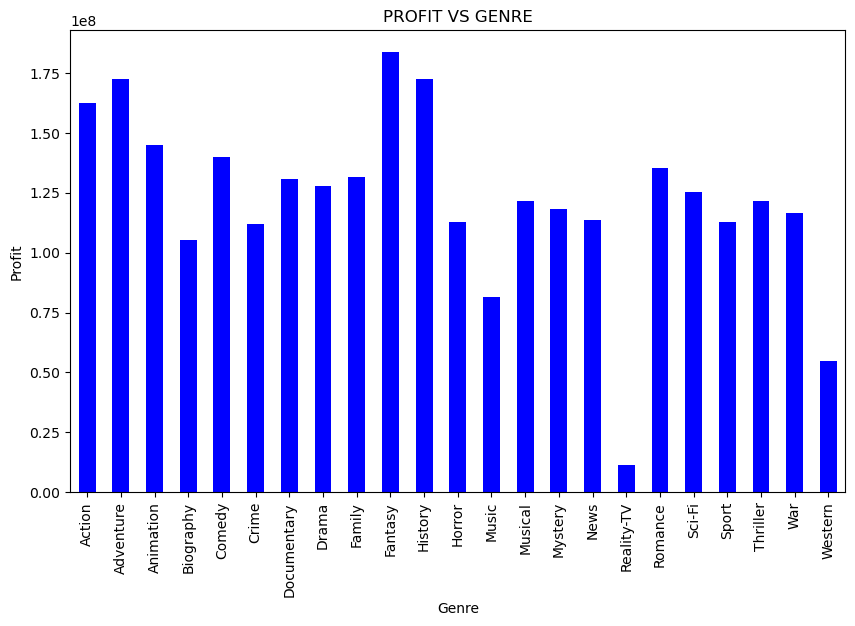

In [333]:
#bar graph between profit ans genre
df6 = df6.sort_values(by='profit', ascending=False)
df6_grouped=df6.groupby('genres')['profit'].mean()
df6_grouped.plot(kind='bar', x='genres', y='profit',color='blue', figsize=(10, 6))
plt.title('PROFIT VS GENRE')
plt.xlabel('Genre')
plt.ylabel('Profit')
plt.show()

<class 'pandas.core.series.Series'>
Index: 23 entries, Action to Western
Series name: profit
Non-Null Count  Dtype  
--------------  -----  
23 non-null     float64
dtypes: float64(1)
memory usage: 368.0+ bytes


In [15]:
df1["foreign_gross"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3382     True
3383     True
3384     True
3385     True
3386     True
Name: foreign_gross, Length: 3387, dtype: bool

In [39]:
df2.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [40]:
df3.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [43]:
df4.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [22]:
df1['title'].value_counts()

Bluebeard               2
Before We Go            1
Knock Knock             1
Kindergarten Teacher    1
Welcome to Leith        1
                       ..
Monsters University     1
Gravity                 1
Man of Steel            1
Thor: The Dark World    1
An Actor Prepares       1
Name: title, Length: 3386, dtype: int64

In [36]:
df2['primary_title']

0                                           Sunghursh
1                     One Day Before the Rainy Season
2                          The Other Side of the Wind
3                                     Sabse Bada Sukh
4                            The Wandering Soap Opera
                             ...                     
146139                            Kuambil Lagi Hatiku
146140    Rodolpho Teóphilo - O Legado de um Pioneiro
146141                                Dankyavar Danka
146142                                         6 Gunn
146143                 Chico Albuquerque - Revelações
Name: primary_title, Length: 146144, dtype: object

In [37]:
df1['title']

0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: title, Length: 3387, dtype: object

In [23]:
df1['title'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Name: title, Length: 3387, dtype: bool

In [24]:
df2['primary_title'].value_counts()

Home                              24
The Return                        20
Broken                            20
Homecoming                        16
Alone                             16
                                  ..
Viktor                             1
Hooked to the Silver Screen        1
Anaamika                           1
Blood for Blood                    1
Chico Albuquerque - Revelações     1
Name: primary_title, Length: 136071, dtype: int64

In [25]:
df2['primary_title'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
146139    False
146140    False
146141    False
146142    False
146143    False
Name: primary_title, Length: 146144, dtype: bool

In [28]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [49]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [33]:
df1.columns= df1.columns.map(lambda col: col.strip())
df1.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

0.0           367
8000000.0       9
2000000.0       6
7000000.0       6
4000000.0       4
             ... 
39498360.0      1
94875000.0      1
77593167.0      1
36299670.0      1
181041.0        1
Name: worldwide_gross, Length: 5356, dtype: int64

In [133]:
df4['worldwide_gross'] = df4['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [50]:
df4['worldwide_gross']/1e+06

0       2776.345279
1       1045.663875
2        149.762350
3       1403.013963
4       1316.721747
           ...     
5777       0.000000
5778       0.240495
5779       0.001338
5780       0.000000
5781       0.181041
Name: worldwide_gross, Length: 5782, dtype: float64

In [127]:
(df4['worldwide_gross'] < 10).sum()

367

,tconst,title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,91.0,Action,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0249516,Foodfight!,2012,91.0,Animation,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
2,tt0249516,Foodfight!,2012,91.0,Comedy,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
7,tt3844362,The Overnight,2015,79.0,Comedy,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
8,tt3844362,The Overnight,2015,79.0,Mystery,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
...,...,...,...,...,...,...,...,...,...,...
7859,tt9607270,The Blue Bird,2015,84.0,Drama,71,"Jan 1, 1976","$1,200,000","$887,000","$887,000"
7863,tt9805168,Traitor,2015,110.0,Action,25,"Aug 27, 2008","$22,000,000","$23,530,831","$27,882,226"
7864,tt9805168,Traitor,2015,110.0,Drama,25,"Aug 27, 2008","$22,000,000","$23,530,831","$27,882,226"
7865,tt9805168,Traitor,2015,110.0,Romance,25,"Aug 27, 2008","$22,000,000","$23,530,831","$27,882,226"


In [136]:
df4['production_budget']= df4['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df4['production_budget']/1e+06

0       425.0000
1       410.6000
2       350.0000
3       330.6000
4       317.0000
          ...   
5777      0.0070
5778      0.0060
5779      0.0050
5780      0.0014
5781      0.0011
Name: production_budget, Length: 5782, dtype: float64

In [54]:
df4_filtered =df4[df4['worldwide_gross']>= 10]
df4_filtered.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5769,70,"Apr 1, 1996",Bang,"$10,000",$527,527.0
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,"$10,000",$401,401.0
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584",4584.0
5773,74,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920",2041928.0
5774,75,"Oct 8, 2004",Primer,"$7,000","$424,760",841926.0
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071",71644.0
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,900.0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482",240495.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338",1338.0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041",181041.0


In [57]:
df4['production_budget'].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [112]:
df4['worldwide_gross'].describe()

count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64

In [58]:
df4_filtered =df4[df4['production_budget']>= 10]
df4_filtered.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5772,73,"Jan 13, 2012",Newlyweds,9000.0,"$4,584",4584.0
5773,74,"Feb 26, 1993",El Mariachi,7000.0,"$2,040,920",2041928.0
5774,75,"Oct 8, 2004",Primer,7000.0,"$424,760",841926.0
5775,76,"May 26, 2006",Cavite,7000.0,"$70,071",71644.0
5776,77,"Dec 31, 2004",The Mongol King,7000.0,$900,900.0
5777,78,"Dec 31, 2018",Red 11,7000.0,$0,0.0
5778,79,"Apr 2, 1999",Following,6000.0,"$48,482",240495.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338",1338.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,$0,0.0
5781,82,"Aug 5, 2005",My Date With Drew,1100.0,"$181,041",181041.0


In [67]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 271.2+ KB


In [169]:
df4['Profit'] =df4['worldwide_gross'] - df4['production_budget']


In [170]:
df4['Profit']

0       2.351345e+09
1       6.350639e+08
2      -2.002376e+08
3       1.072414e+09
4       9.997217e+08
            ...     
5777   -7.000000e+03
5778    2.344950e+05
5779   -3.662000e+03
5780   -1.400000e+03
5781    1.799410e+05
Name: Profit, Length: 5782, dtype: float64

In [171]:
df4['Profit'].describe()

count    5.782000e+03
mean     5.989970e+07
std      1.460889e+08
min     -2.002376e+08
25%     -2.189071e+06
50%      8.550286e+06
75%      6.096850e+07
max      2.351345e+09
Name: Profit, dtype: float64

In [172]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   float64
 6   Profit             5782 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 316.3+ KB


In [154]:
df4['production_budget'].mean()/1e+08


0.31587757096506397

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

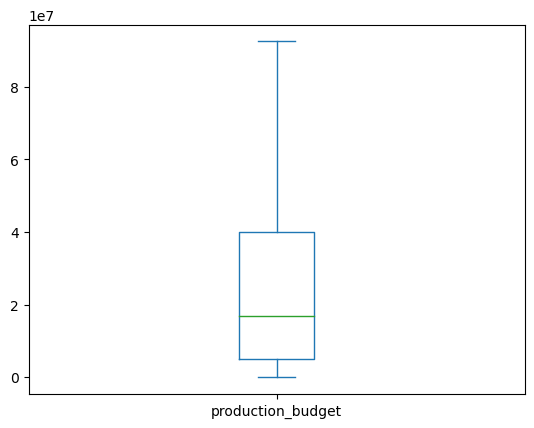

In [168]:
df4['production_budget'].plot.box(showfliers=False);

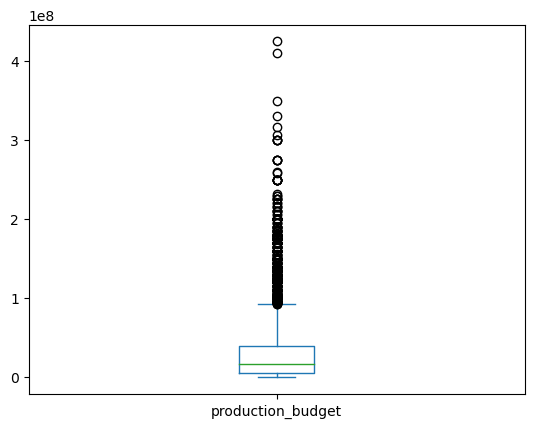

In [176]:
df4['production_budget'].plot.box();

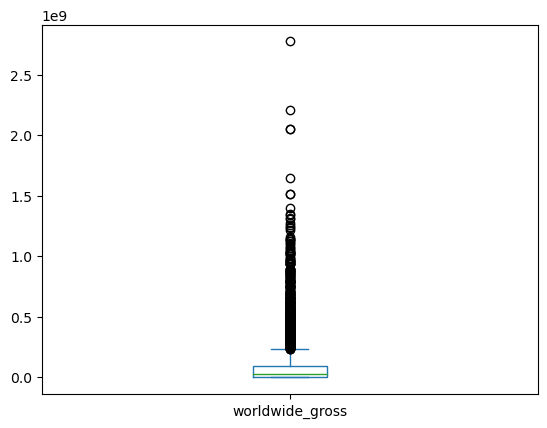

In [177]:
df4['worldwide_gross'].plot.box();

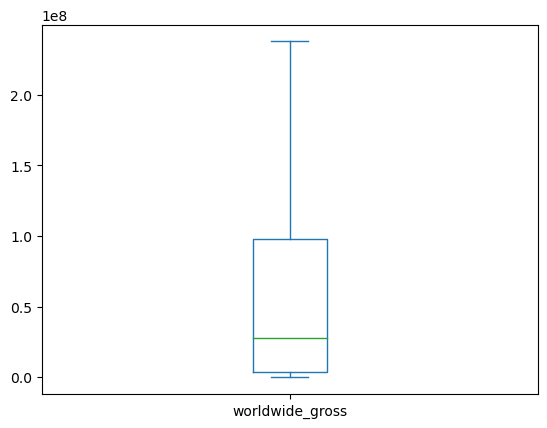

In [173]:
df4['worldwide_gross'].plot.box(showfliers=False);

In [166]:
(df4['production_budget'] >2e+09).sum()

0

In [160]:
(df4['production_budget'] >1e+08).sum()

363

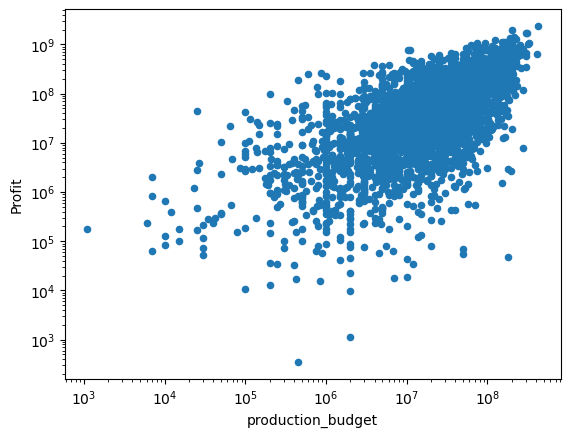

In [179]:
df4.plot.scatter('production_budget','Profit');
plt.xscale('log')
plt.yscale('log')

In [76]:
df4['production_budget'].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [77]:
df4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,9.997217e+08


In [ ]:
df1[.plot.box();

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***